In [49]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [50]:
quandl.ApiConfig.api_key = 'zcsSFzBsHHYpvoyUj8h7'

company = input("Please enter the company abbreviation to predict")

df = quandl.get(f"WIKI/{company}")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


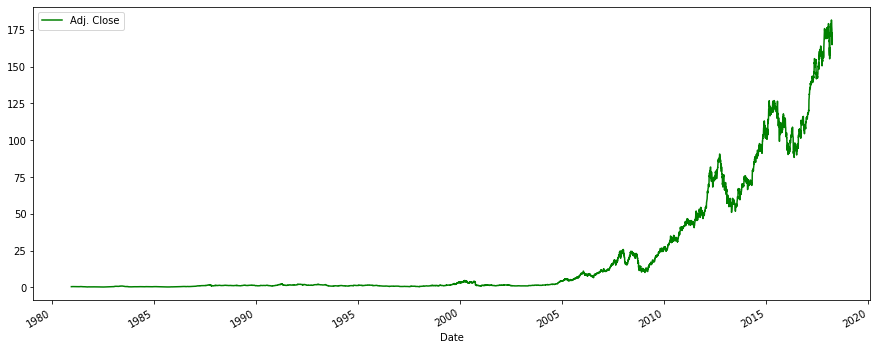

In [51]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [52]:
start_date = datetime.date(2018, 3, 8)
current_date = datetime.date.today()
forecast = current_date - start_date
# Gets thedifference between the end of the data and today's date and converts it to an integer
forecast_in_days = forecast.days + 1
print(forecast_in_days)
# Shifts the initial graph by -(date difference)
df['Prediction'] = df[['Adj. Close']].shift(-forecast_in_days)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
# Populates the X axis with the forecasted days
X_forecast = X[-forecast_in_days:]
X = X[:-forecast_in_days]
# Populates the Y axis with the predicted change for the appended days
y = np.array(df['Prediction'])
y = y[:-forecast_in_days]

1042


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print(f"linear confidence: {confidence}")

forecast_predicted = clf.predict(X_forecast)
print(f"predictions: {forecast_predicted}")
print(len(forecast_predicted))

linear confidence: 0.8601402168718357
predictions: [144.62860045 145.67587624 146.49440495 ... 346.38998175 362.62454926
 353.43947467]
1042


<AxesSubplot:xlabel='Date'>

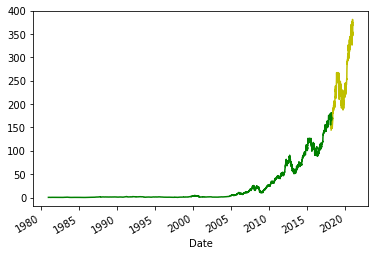

In [54]:
dates = pd.date_range(start=start_date, end=current_date)
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')